# Treinamento e comparação dos modelos

Objetivo: Treinar vários modelos com vários datasets para comparar os resultados.

In [135]:
#Importing most used modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
sns.set_palette('viridis')
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve
import joblib
import warnings
warnings.filterwarnings("ignore") #Filtering some warnings for better presentation

### 1. Carregando os datasets

In [2]:
#Loading the datasets - local
test_sets = ['numeric','categoricals_binned','one_hot_encoded','outliers_removed',
             'one_hot_encoded_rescaled','oversampled+','oversampled-','smoted+','smoted-']
datasets = {}
for key in test_sets:
    datasets[key] = pd.read_csv(f'datasets/{key}.csv')

In [3]:
#Defining the X,y spliter
def df_splitter(dataset, target = 'Response'):
    X = dataset.drop(columns=[target])
    y = dataset[target].values
    return X, y

In [4]:
# Defining the printing function
def display_scores(scores):
    print("Scores:", scores)
    print("\nMean:", scores.mean())
    print("Standard deviation:", scores.std())

### 2. Testando os datasets

Como temos várias opções de datasets, nós vamos fazer um teste rápido dos modelos para ter uma noção dos resultados, para selecionar futuros modelos.

In [5]:
first_results = []

#### 2.1 Classificador K-Neighbors (KNN)

In [6]:
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    knn_test = cross_val_score(knn_clf,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'KNN', 'dataset':key, 'score':knn_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(knn_test)


-----
Dataset: numeric
Scores: [0.71228536 0.71211675 0.71491745]

Mean: 0.7131065181467098
Standard deviation: 0.0012823729935557734

-----
Dataset: categoricals_binned
Scores: [0.71059032 0.70769458 0.71005307]

Mean: 0.7094459858904245
Standard deviation: 0.0012577064482832434

-----
Dataset: one_hot_encoded
Scores: [0.71022183 0.70850531 0.70953715]

Mean: 0.7094214273332063
Standard deviation: 0.0007055284432189075

-----
Dataset: outliers_removed
Scores: [0.71475655 0.70724399 0.71301221]

Mean: 0.711670917757777
Standard deviation: 0.00321029198290776

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.71464367 0.71395932 0.71587559]

Mean: 0.7148261929129059
Standard deviation: 0.0007928897487709854

-----
Dataset: oversampled+
Scores: [0.62038204 0.6198303  0.6208    ]

Mean: 0.620337448371037
Standard deviation: 0.0003971309629555497

-----
Dataset: oversampled-
Scores: [0.61266322 0.611905   0.6137282 ]

Mean: 0.6127654698725807
Standard deviation: 0.0007478214047553315

--

#### 2.2 Classificador Bayesiano Ingênuo Gaussiano (Gaussian Naive Bayes)

In [7]:
nbg_clf = GaussianNB()
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    nbg_test = cross_val_score(nbg_clf,X_train,y_train, n_jobs=-1, cv=5, scoring='accuracy')
    first_results.append({'model':'Naive Bayes', 'dataset':key, 'score':nbg_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(nbg_test)


-----
Dataset: numeric
Scores: [0.75592679 0.74695983 0.74462597 0.75113622 0.74695983]

Mean: 0.7491217295172583
Standard deviation: 0.003998162378626328

-----
Dataset: categoricals_binned
Scores: [0.75690947 0.74953937 0.74376612 0.75224174 0.746837  ]

Mean: 0.749858739712566
Standard deviation: 0.004510973372125921

-----
Dataset: one_hot_encoded
Scores: [0.75506695 0.74941653 0.7443803  0.7492937  0.74867952]

Mean: 0.7493673995823609
Standard deviation: 0.003401088891060924

-----
Dataset: outliers_removed
Scores: [0.75418227 0.75156055 0.74956305 0.75402672 0.7445374 ]

Mean: 0.7507739966071254
Standard deviation: 0.003554625483263591

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.72583221 0.72976293 0.72816607 0.71919912 0.72288417]

Mean: 0.725168898169758
Standard deviation: 0.003778530191324014

-----
Dataset: oversampled+
Scores: [0.52828054 0.53139394 0.53373737 0.52711111 0.52864646]

Mean: 0.5298338863750629
Standard deviation: 0.0024044679324950508

-----
Dataset

#### 2.3 Classificador Máquina Vetores de Suporte (Support Vector Machine)

In [8]:
svm = SVC(random_state = 1216, C = 1.0, cache_size = 1024)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    svc_test = cross_val_score(svm,X_train,y_train, n_jobs=-1, cv=2, scoring='accuracy')
    first_results.append({'model':'Support Vector Machine', 'dataset':key, 'score':svc_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(svc_test)


-----
Dataset: numeric
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: categoricals_binned
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: one_hot_encoded
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: outliers_removed
Scores: [0.76038753 0.76038753]

Mean: 0.7603875349580503
Standard deviation: 0.0

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: oversampled+
Scores: [0.5166462  0.53096516]

Mean: 0.5238056758678648
Standard deviation: 0.007159480250824246

-----
Dataset: oversampled-
Scores: [0.50775245 0.50517394]

Mean: 0.5064631951570698
Standard deviation: 0.0012892521197188644

-----
Dataset: smoted+
Scores: [0.67318508 0.66920939]

Mean: 0.6711972331760294
Standard deviatio

#### 2.4 Árvores de decisão

In [9]:
dtc = DecisionTreeClassifier(random_state=1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    dtc_test = cross_val_score(dtc,X_train,y_train, n_jobs=-1, cv=2, scoring='accuracy')
    first_results.append({'model':'Decision Tree', 'dataset':key, 'score':dtc_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(dtc_test)


-----
Dataset: numeric
Scores: [0.66545472 0.66273585]

Mean: 0.664095286587949
Standard deviation: 0.00135943753134532

-----
Dataset: categoricals_binned
Scores: [0.63725249 0.64042846]

Mean: 0.6388404763047
Standard deviation: 0.001587982814796829

-----
Dataset: one_hot_encoded
Scores: [0.64398369 0.640625  ]

Mean: 0.6423043439542082
Standard deviation: 0.0016793439542082123

-----
Dataset: outliers_removed
Scores: [0.64627447 0.64372753]

Mean: 0.6450009988014382
Standard deviation: 0.0012734718337994444

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.64378716 0.640625  ]

Mean: 0.6422060783422592
Standard deviation: 0.0015810783422591235

-----
Dataset: oversampled+
Scores: [0.72916801 0.73243261]

Mean: 0.7308003102980154
Standard deviation: 0.0016322968517680225

-----
Dataset: oversampled-
Scores: [0.73010972 0.73479846]

Mean: 0.7324540897191807
Standard deviation: 0.0023443728806024633

-----
Dataset: smoted+
Scores: [0.68391622 0.68598487]

Mean: 0.6849505462537979
S

#### 2.5 Árvores Extras

In [10]:
extrees = ExtraTreesClassifier(n_jobs=-1, random_state=1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    extrees_test = cross_val_score(extrees,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'Extra Trees', 'dataset':key, 'score':extrees_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(extrees_test)


-----
Dataset: numeric
Scores: [0.74839708 0.74985259 0.75081073]

Mean: 0.7496868023515727
Standard deviation: 0.0009923175815198183

-----
Dataset: categoricals_binned
Scores: [0.73793205 0.73776533 0.73540684]

Mean: 0.7370347402699734
Standard deviation: 0.0011531100974619445

-----
Dataset: one_hot_encoded
Scores: [0.71648611 0.72435142 0.72199292]

Mean: 0.7209434825543427
Standard deviation: 0.0032956294397047925

-----
Dataset: outliers_removed
Scores: [0.71857678 0.72222638 0.71848079]

Mean: 0.7197613160341841
Standard deviation: 0.0017435067655318006

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.71648611 0.72435142 0.72199292]

Mean: 0.7209434825543427
Standard deviation: 0.0032956294397047925

-----
Dataset: oversampled+
Scores: [0.83142636 0.83515152 0.83369697]

Mean: 0.8334249466447662
Standard deviation: 0.0015329061255170064

-----
Dataset: oversampled-
Scores: [0.83439271 0.82925988 0.83753819]

Mean: 0.8337302586526795
Standard deviation: 0.003411913276928968


#### 2.6 Floresta aleatória

In [11]:
rnd_clf = RandomForestClassifier(n_estimators=70,
                                 max_leaf_nodes=None,
                                 bootstrap=True,
                                 oob_score=True,n_jobs = -1,
                                 random_state = 1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    rnd_clf_test = cross_val_score(rnd_clf,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'Random Forest', 'dataset':key, 'score':rnd_clf_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(rnd_clf_test)


-----
Dataset: numeric
Scores: [0.75488245 0.75670696 0.7550855 ]

Mean: 0.7555583018265367
Standard deviation: 0.0008164410781646076

-----
Dataset: categoricals_binned
Scores: [0.7478812  0.7499263  0.74985259]

Mean: 0.7492200304343605
Standard deviation: 0.0009471742677313469

-----
Dataset: one_hot_encoded
Scores: [0.74471221 0.75051592 0.75014741]

Mean: 0.7484585123768754
Standard deviation: 0.002653303283560516

-----
Dataset: outliers_removed
Scores: [0.74883895 0.75016855 0.75031838]

Mean: 0.7497752930568754
Standard deviation: 0.0006649128782569847

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.74478591 0.75051592 0.7500737 ]

Mean: 0.7484585105663065
Standard deviation: 0.002603189114267456

-----
Dataset: oversampled+
Scores: [0.82846892 0.83612121 0.8326303 ]

Mean: 0.8324068126234713
Standard deviation: 0.003128028585296697

-----
Dataset: oversampled-
Scores: [0.83178123 0.82743668 0.82970336]

Mean: 0.8296404227649076
Standard deviation: 0.0017742117696808272

-

#### 2.7 AdaBoost

In [12]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.8, random_state = 1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    ada_boost_test = cross_val_score(ada_boost,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'AdaBoost', 'dataset':key, 'score':ada_boost_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(ada_boost_test)


-----
Dataset: numeric
Scores: [0.75945169 0.75980248 0.75906545]

Mean: 0.7594398719611991
Standard deviation: 0.0003010065924008337

-----
Dataset: categoricals_binned
Scores: [0.75996757 0.75980248 0.75994988]

Mean: 0.7599066438784113
Standard deviation: 7.401075954548328e-05

-----
Dataset: one_hot_encoded
Scores: [0.75989388 0.75980248 0.75987618]

Mean: 0.7598575104688545
Standard deviation: 3.957989254669246e-05

-----
Dataset: outliers_removed
Scores: [0.76022472 0.76028167 0.76020676]

Mean: 0.760237715066819
Standard deviation: 3.193349830681007e-05

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.75989388 0.75980248 0.75994988]

Mean: 0.7598820780789174
Standard deviation: 6.0753578180248605e-05

-----
Dataset: oversampled+
Scores: [0.56530592 0.56213333 0.55873939]

Mean: 0.5620595506113203
Standard deviation: 0.0026812825313568974

-----
Dataset: oversampled-
Scores: [0.56132052 0.55627279 0.55533655]

Mean: 0.5576432883196627
Standard deviation: 0.0026281390582369975

#### 2.8 Analisando os resultados

In [13]:
#Printing results comparison chart
results = first_results
results = pd.DataFrame(results)
results = results.pivot(index='model', columns = 'dataset', values = 'score')
results = results.reindex(columns= [ 'numeric','categoricals_binned','one_hot_encoded','one_hot_encoded_rescaled','outliers_removed','oversampled+','oversampled-','smoted+','smoted-'])
results = results.reindex(['KNN', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Extra Trees', 'Random Forest', 'AdaBoost'])
results.style.background_gradient(cmap='bwr_r', low=0.7, high=0.8, axis=0)

dataset,numeric,categoricals_binned,one_hot_encoded,one_hot_encoded_rescaled,outliers_removed,oversampled+,oversampled-,smoted+,smoted-
model,,,,,,,,,
KNN,0.713107,0.709446,0.709421,0.714826,0.711671,0.620337,0.612765,0.616281,0.651036
Naive Bayes,0.749122,0.749859,0.749367,0.725169,0.750774,0.529834,0.534287,0.735228,0.634644
Support Vector Machine,0.760373,0.760373,0.760373,0.760373,0.760388,0.523806,0.506463,0.671197,0.505067
Decision Tree,0.664095,0.638840,0.642304,0.642206,0.645001,0.730800,0.732454,0.684951,0.730237
Extra Trees,0.749687,0.737035,0.720943,0.720943,0.719761,0.833425,0.833730,0.758517,0.786722
Random Forest,0.755558,0.749220,0.748459,0.748459,0.749775,0.832407,0.829640,0.770735,0.805545
AdaBoost,0.759440,0.759907,0.759858,0.759882,0.760238,0.562060,0.557643,0.755899,0.817929


O gráfico de resultado mostra que os melhores resultados foram com:
* Árvores extras com o dataset 'oversampled-'
* Floresta aleatória com o dataset 'oversampled+'
* AdaBoost com o dataset 'smoted-'

Algumas observações já podem ser feitas:

* Máquina de Vetores de Suporte e AdaBoost tiveram bons resultados de plano com os datasets não reamostrados.
* Árvore de Decisão teve resultados melhores com os datasets reamostrados.
* Floresta aleatória teve melhores resultados com o dataset rebalanceado.
* Os modelos foram significativamente piores usando o SMOTE Borderline e RobustScaler, do que simplesmente removendo os outliers.
* AdaBoost se beneficiou bastante dos dados reamostrados usando o SMOTE.
* Árvores extras e Floresta aleatória tiveram resultados próximos.

### 3. Usando Grid Search com os modelos

#### 3.1 Árvores Extras

In [14]:
#Preparing the classifier
extra_tree = ExtraTreesClassifier(n_estimators=1000, random_state=1216, n_jobs = -1)
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [15]:
#Setting the parameters for the grid search
min_samples_split = np.array([2,10,40])
max_depth = np.array([10,50,100,None])
max_leaf_nodes = np.array([5,20,None])
values_grid = {'min_samples_split': min_samples_split,
               'max_depth': max_depth,
               'max_leaf_nodes':max_leaf_nodes}

In [16]:
#Using grid search to find the best values
gridExtraTrees = GridSearchCV(estimator = extra_tree,
                                param_grid = values_grid,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridExtraTrees.fit(X_train, y_train);

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=2;, score=0.568 total time=   3.3s
[CV 2/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=2;, score=0.559 total time=   3.3s
[CV 1/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=10;, score=0.568 total time=   3.6s
[CV 2/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=10;, score=0.559 total time=   3.2s
[CV 1/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=40;, score=0.568 total time=   3.3s
[CV 2/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=40;, score=0.559 total time=   3.2s
[CV 1/2] END max_depth=10, max_leaf_nodes=20, min_samples_split=2;, score=0.579 total time=   4.5s
[CV 2/2] END max_depth=10, max_leaf_nodes=20, min_samples_split=2;, score=0.573 total time=   4.3s
[CV 1/2] END max_depth=10, max_leaf_nodes=20, min_samples_split=10;, score=0.579 total time=   4.5s
[CV 2/2] END max_depth=10, max_leaf_nodes=20, min

In [17]:
extra_trees_results = pd.DataFrame(gridExtraTrees.cv_results_)
extra_trees_results.sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
15,20.788077,0.430913,3.250595,0.068455,50,None,2,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.778990,0.777570,0.778280,0.000710,1
24,20.995173,0.496355,3.149751,0.092315,100,None,2,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.778563,0.777898,0.778230,0.000332,2
33,22.326006,1.296914,3.258998,0.057538,None,None,2,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.778563,0.777898,0.778230,0.000332,2
16,16.083295,0.514300,2.607123,0.129331,50,None,10,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.734380,0.739003,0.736692,0.002312,4
34,16.322945,0.358101,2.788210,0.237688,None,None,10,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.734183,0.739003,0.736593,0.002410,5
25,13.942547,0.042464,2.364602,0.057508,100,None,10,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.734183,0.739003,0.736593,0.002410,5
26,11.565588,0.103171,2.075559,0.062541,100,None,40,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.671934,0.674978,0.673456,0.001522,7
17,10.900350,0.095924,2.591187,0.239595,50,None,40,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.671934,0.674978,0.673456,0.001522,7
35,12.410065,0.086075,2.213723,0.214518,None,None,40,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.671934,0.674978,0.673456,0.001522,7
6,8.538758,0.119055,1.550643,0.008435,10,None,2,"{'max_depth': 10, 'max_leaf_nodes': None, 'min...",0.618586,0.609178,0.613882,0.004704,10


In [18]:
print(gridExtraTrees.best_estimator_)

ExtraTreesClassifier(max_depth=50, n_estimators=1000, n_jobs=-1,
                     random_state=1216)


In [19]:
best_extra_trees = gridExtraTrees.best_estimator_
best_extra_trees.fit(X_train, y_train);

In [20]:
teste_xtr = best_extra_trees.predict(X_test)
print(classification_report(y_test, teste_xtr))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7581
           1       0.88      0.93      0.91      7640

    accuracy                           0.90     15221
   macro avg       0.91      0.90      0.90     15221
weighted avg       0.91      0.90      0.90     15221



Após fazer grid search com alguns parâmetros, o modelo de árvores extras teve um resultado significativo com o seu melhor resultado.

#### 3.2 Floresta aleatória

In [21]:
#Setting the Classifier
rand_forest = RandomForestClassifier(criterion='gini',
                                 max_leaf_nodes=None,
                                 bootstrap=True,
                                 oob_score=True,
                                 n_jobs = -1)
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [22]:
# Grid search parameters
n_estimators = np.array([1000,2000])
max_depth = np.array([50,None])
values_grid_forest = {'n_estimators': n_estimators, 'max_depth': max_depth}

In [23]:
#Using grid search to find the best values
gridForest = GridSearchCV(estimator = rand_forest,
                                param_grid = values_grid_forest,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridForest.fit(X_train, y_train);

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ...max_depth=50, n_estimators=1000;, score=0.779 total time=  31.4s
[CV 2/2] END ...max_depth=50, n_estimators=1000;, score=0.782 total time=  29.6s
[CV 1/2] END ...max_depth=50, n_estimators=2000;, score=0.779 total time=  57.2s
[CV 2/2] END ...max_depth=50, n_estimators=2000;, score=0.781 total time=  58.8s
[CV 1/2] END .max_depth=None, n_estimators=1000;, score=0.778 total time=  26.5s
[CV 2/2] END .max_depth=None, n_estimators=1000;, score=0.780 total time=  26.2s
[CV 1/2] END .max_depth=None, n_estimators=2000;, score=0.779 total time=  53.3s
[CV 2/2] END .max_depth=None, n_estimators=2000;, score=0.781 total time=  55.9s


In [24]:
forest_results = pd.DataFrame(gridForest.cv_results_)
forest_results.sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,27.848772,0.746842,2.742522,0.158408,50,1000,"{'max_depth': 50, 'n_estimators': 1000}",0.778880,0.781563,0.780222,0.001341,1
1,52.158626,0.812655,5.959959,0.023476,50,2000,"{'max_depth': 50, 'n_estimators': 2000}",0.779010,0.781208,0.780109,0.001099,2
3,49.265794,1.019699,5.435865,0.241771,None,2000,"{'max_depth': None, 'n_estimators': 2000}",0.778848,0.781240,0.780044,0.001196,3
2,23.760490,0.017741,2.681777,0.173825,None,1000,"{'max_depth': None, 'n_estimators': 1000}",0.777878,0.780496,0.779187,0.001309,4


In [25]:
print(gridForest.best_estimator_)

RandomForestClassifier(max_depth=50, n_estimators=1000, n_jobs=-1,
                       oob_score=True)


In [26]:
best_forest = gridForest.best_estimator_
best_forest.fit(X_train, y_train);

In [27]:
teste_rnd = best_forest.predict(X_test)
print(classification_report(y_test, teste_rnd))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7680
           1       0.89      0.93      0.91      7790

    accuracy                           0.91     15470
   macro avg       0.91      0.90      0.91     15470
weighted avg       0.91      0.91      0.91     15470



Após fazer grid search com alguns parâmetros, o floresta aleatória foi ligeiramente melhor.

#### 3.3 AdaBoost

In [28]:
#Setting the classifier
ada_boost = AdaBoostClassifier(random_state = 1216)
X, y = df_splitter(datasets['smoted-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [29]:
n_estimators = np.array([200,300,600])
learning_rate = np.array([1.0,1.5])
values_grid_ada = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [30]:
#Using grid search to find the best values
gridAda = GridSearchCV(estimator = ada_boost,
                                param_grid = values_grid_ada,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridAda.fit(X_train, y_train);

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END learning_rate=1.0, n_estimators=200;, score=0.814 total time=   7.6s
[CV 2/2] END learning_rate=1.0, n_estimators=200;, score=0.815 total time=   7.6s
[CV 1/2] END learning_rate=1.0, n_estimators=300;, score=0.817 total time=  11.0s
[CV 2/2] END learning_rate=1.0, n_estimators=300;, score=0.817 total time=  11.3s
[CV 1/2] END learning_rate=1.0, n_estimators=600;, score=0.817 total time=  20.9s
[CV 2/2] END learning_rate=1.0, n_estimators=600;, score=0.818 total time=  23.0s
[CV 1/2] END learning_rate=1.5, n_estimators=200;, score=0.817 total time=   7.6s
[CV 2/2] END learning_rate=1.5, n_estimators=200;, score=0.818 total time=   8.4s
[CV 1/2] END learning_rate=1.5, n_estimators=300;, score=0.817 total time=  11.1s
[CV 2/2] END learning_rate=1.5, n_estimators=300;, score=0.817 total time=  10.9s
[CV 1/2] END learning_rate=1.5, n_estimators=600;, score=0.817 total time=  21.5s
[CV 2/2] END learning_rate=1.5, n_esti

In [31]:
ada_results = pd.DataFrame(gridForest.cv_results_)
ada_results.sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,27.848772,0.746842,2.742522,0.158408,50,1000,"{'max_depth': 50, 'n_estimators': 1000}",0.778880,0.781563,0.780222,0.001341,1
1,52.158626,0.812655,5.959959,0.023476,50,2000,"{'max_depth': 50, 'n_estimators': 2000}",0.779010,0.781208,0.780109,0.001099,2
3,49.265794,1.019699,5.435865,0.241771,None,2000,"{'max_depth': None, 'n_estimators': 2000}",0.778848,0.781240,0.780044,0.001196,3
2,23.760490,0.017741,2.681777,0.173825,None,1000,"{'max_depth': None, 'n_estimators': 1000}",0.777878,0.780496,0.779187,0.001309,4


In [32]:
print(gridAda.best_estimator_)

AdaBoostClassifier(n_estimators=600, random_state=1216)


In [33]:
best_ada = gridAda.best_estimator_
best_ada.fit(X_train, y_train);

In [34]:
teste_ada = best_ada.predict(X_test)
print(classification_report(y_test, teste_ada))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      7581
           1       0.93      0.68      0.79      7640

    accuracy                           0.82     15221
   macro avg       0.84      0.82      0.81     15221
weighted avg       0.84      0.82      0.81     15221



Já o AdaBoost não melhorou usando grid search.

### 4. Validação cruzada

#### 4.1 Árvores aleatórias

In [35]:
#Extra trees cross-validation
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   #No fixed seed for a new train/test split
extrees = ExtraTreesClassifier(max_depth=50,
                               n_estimators=1000,
                               n_jobs=-1)  #No fixed seed this time, so the model can train new random states
extrees_test = cross_val_score(extrees,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy') #Only 3 to avoid excessive memory overload of our instance
display_scores(extrees_test)

Scores: [0.83104213 0.83541934 0.8330541 ]

Mean: 0.8331718563429487
Standard deviation: 0.0017889260701693106


A validação cruzada não demosntrou melhora significativa na validação cruzada.

In [36]:
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
teste_xtr = best_extra_trees.predict(X_test)
print(classification_report(y_test, teste_xtr))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7581
           1       0.88      0.93      0.91      7640

    accuracy                           0.90     15221
   macro avg       0.91      0.90      0.90     15221
weighted avg       0.91      0.90      0.90     15221



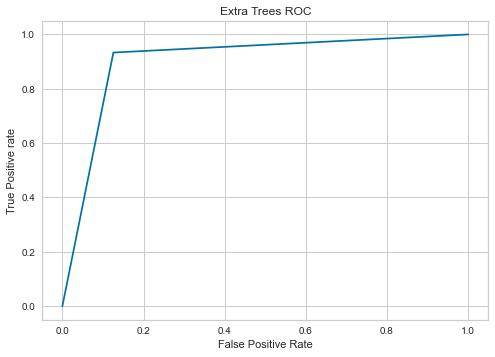

In [37]:
#Getting ROC Graph
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
y_pred = best_extra_trees.predict(X_test)
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr, label='Extra Trees ROC')
plt.title('Extra Trees ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate');

0.9038827935089678

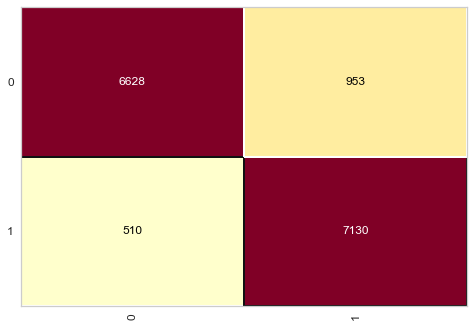

In [38]:
cm = ConfusionMatrix(best_extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

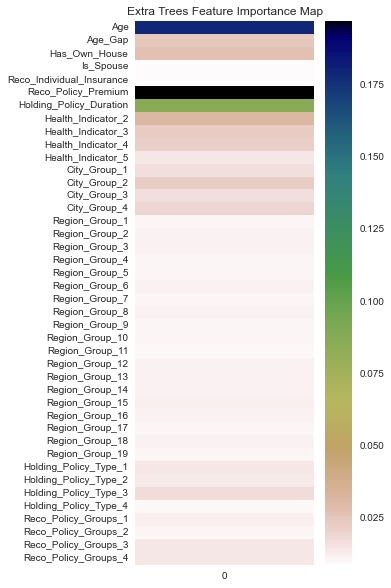

In [39]:
feature_imp = pd.DataFrame(best_extra_trees.feature_importances_, index = X.columns)
plt.figure(figsize = (4,10))
sns.heatmap(feature_imp, annot=False, cmap='gist_earth_r').set(title='Extra Trees Feature Importance Map');

A árvore de importância do árvores extras em seu melhor resultado demonstra que as características mais imporantes foram : O prêmio do seguro, a idade do cliente, e há quanto tempo o cliente já faz parte da operadora ('Holding_Policy_Duration')

#### 4.2 Random forest

In [40]:
# Random forest cross-validation
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #No fixed seed for a new train/test split
rand_forest = RandomForestClassifier(criterion='gini',
                                     max_leaf_nodes=None,
                                     bootstrap=True,
                                     oob_score=True,
                                     n_estimators=1000,
                                     n_jobs = -1) #No fixed seed this time, so the model can train new random states
rand_forest_test = cross_val_score(rand_forest,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy') #Only 3 to avoid excessive memory overload of our instance
display_scores(rand_forest_test)

Scores: [0.82701445 0.83461818 0.82938182]

Mean: 0.83033814926145
Standard deviation: 0.0031770132372734242


In [41]:
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
teste_rnd = best_forest.predict(X_test)
print(classification_report(y_test, teste_rnd))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7680
           1       0.89      0.93      0.91      7790

    accuracy                           0.91     15470
   macro avg       0.91      0.90      0.91     15470
weighted avg       0.91      0.91      0.91     15470



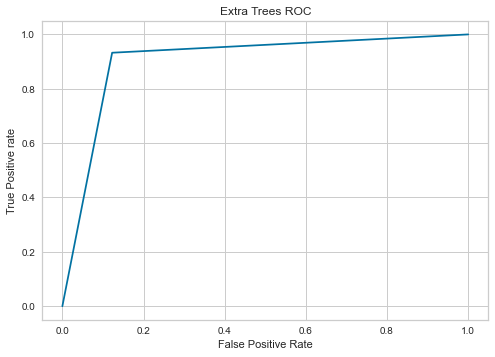

In [42]:
#Getting ROC Graph
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
y_pred = best_forest.predict(X_test)
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr, label='Random Forest ROC')
plt.title('Extra Trees ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate');

0.9051712992889464

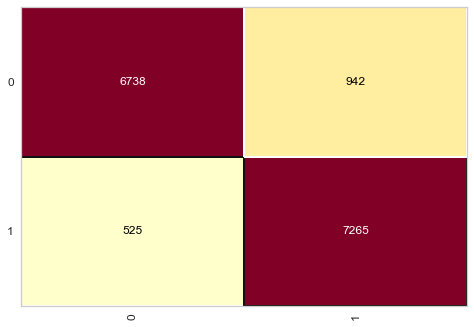

In [43]:
cm = ConfusionMatrix(best_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

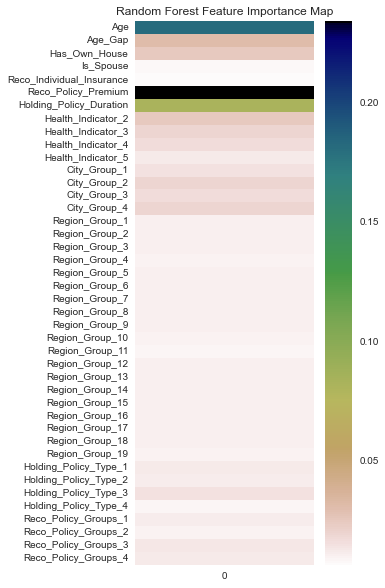

In [44]:
feature_imp = pd.DataFrame(best_forest.feature_importances_, index = X.columns)
plt.figure(figsize = (4,10))
sns.heatmap(feature_imp, annot=False, cmap='gist_earth_r').set(title='Random Forest Feature Importance Map');

Já o o modelo de floresta aleatória deu muito mais importância para o preço do seguro (observar a escala).

#### 4.3 Comparação dos melhores modelos com os outros datasets

In [126]:
last_results = []

In [127]:
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    best_extra_trees_test = cross_val_score(best_extra_trees,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    last_results.append({'model':'Extra Trees', 'dataset':key, 'score':best_extra_trees_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(best_extra_trees_test)


-----
Dataset: numeric
Scores: [0.75191615 0.7504586  0.75052411]

Mean: 0.7509662841512044
Standard deviation: 0.0006721875135531555

-----
Dataset: categoricals_binned
Scores: [0.73698002 0.74076258 0.73820755]

Mean: 0.7386500484796548
Standard deviation: 0.0015756043570846108

-----
Dataset: one_hot_encoded
Scores: [0.72178185 0.71698113 0.72248428]

Mean: 0.7204157542397381
Standard deviation: 0.0024455158298871678

-----
Dataset: outliers_removed
Scores: [0.72146757 0.71693967 0.72120123]

Mean: 0.7198694899453989
Standard deviation: 0.0020745454690900378

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.72217491 0.71553983 0.71750524]

Mean: 0.7184066610999755
Standard deviation: 0.0027827423340175635

-----
Dataset: oversampled+
Scores: [0.85480952 0.85299948 0.85626859]

Mean: 0.8546925281357519
Standard deviation: 0.0013371669897449497

-----
Dataset: oversampled-
Scores: [0.85256888 0.85375148 0.85213087]

Mean: 0.8528170761975676
Standard deviation: 0.0006844908629921752

In [128]:
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    best_forest_test = cross_val_score(best_forest,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    last_results.append({'model':'Random Forest', 'dataset':key, 'score':best_forest_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(best_forest_test)


-----
Dataset: numeric
Scores: [0.75728791 0.75478249 0.75727201]

Mean: 0.7564474736217347
Standard deviation: 0.0011773357409238564

-----
Dataset: categoricals_binned
Scores: [0.75204717 0.75019654 0.75229298]

Mean: 0.7515122281803214
Standard deviation: 0.0009357280477393017

-----
Dataset: one_hot_encoded
Scores: [0.74923027 0.7490173  0.75203092]

Mean: 0.7500928277807191
Standard deviation: 0.0013731951020676686

-----
Dataset: outliers_removed
Scores: [0.7504994  0.74910108 0.75016647]

Mean: 0.7499223154436897
Standard deviation: 0.0005963967169416446

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.75132656 0.75019654 0.75176887]

Mean: 0.7510973242801354
Standard deviation: 0.0006620504675526223

-----
Dataset: oversampled+
Scores: [0.85476642 0.85299948 0.85708745]

Mean: 0.8549511160065159
Standard deviation: 0.0016740060573256553

-----
Dataset: oversampled-
Scores: [0.85659848 0.85291928 0.85318208]

Mean: 0.8542332793132145
Standard deviation: 0.0016758903657053314

In [129]:
#Printing results comparison chart
results = last_results
results = pd.DataFrame(results)
results = results.pivot(index='model', columns = 'dataset', values = 'score')
results = results.reindex(columns= [ 'numeric','categoricals_binned','one_hot_encoded','one_hot_encoded_rescaled','outliers_removed','oversampled+','oversampled-','smoted+','smoted-'])
results = results.reindex(['Random Forest','Extra Trees'])
results

dataset,numeric,categoricals_binned,one_hot_encoded,one_hot_encoded_rescaled,outliers_removed,oversampled+,oversampled-,smoted+,smoted-
model,,,,,,,,,
Random Forest,0.756447,0.751512,0.750093,0.751097,0.749922,0.854951,0.854233,0.777032,0.807338
Extra Trees,0.750966,0.738650,0.720416,0.718407,0.719869,0.854693,0.852817,0.758961,0.785613


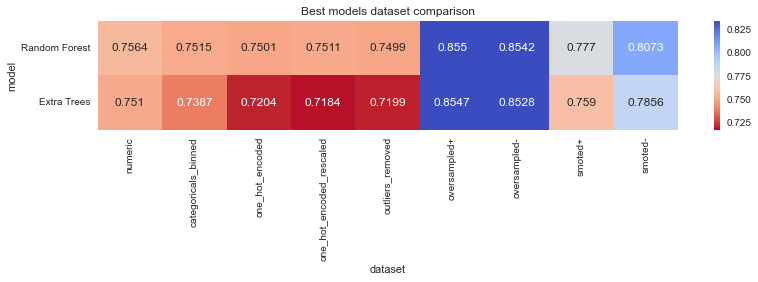

In [130]:
plt.figure(figsize = (13,2))
sns.heatmap(results, annot=True, fmt='.4g',cmap='coolwarm_r', vmin=0.717, vmax=0.834).set(title='Best models dataset comparison');

In [131]:
print(results.mean(axis=1))

model
Random Forest    0.783625
Extra Trees      0.766710
dtype: float64


Após comparar os modelos com os outros datasets, mas dessa vez sem usar o mesmo seed state para a divisão dos conjuntos, observa-se que os modelos se mantiveram relativamente acurados para os para os datasets rebalanceados com o random oversampler, sem significativa diferença com o robust scaler.

Já os dados rebalanceados usando o SMOTE Borderline não tiveram resultados próximos, embora o Floresta aleatória conseguiu se manter próximo.

Os valores de acurácia excelentes de 0.90 e 0.91 indicam a ser provável o overfitting.

Porém, os resultados do último teste demonstram que esse é um valor mais próximo do que seria esperado em um modelo em produção.

A título de comparação, seguem alguns resultados de competidores do Kaggle:

| Modelo | Valores |
| --- | --- |
| Random Forest | 0.81, 0.90 |
| Extra Trees | 0.85 |
| XGB | 0.82 |
| AdaBoost | 0,59 |
| PyTorch | 0,75 |